<a href="https://colab.research.google.com/github/dami163/Assignment/blob/main/Q_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

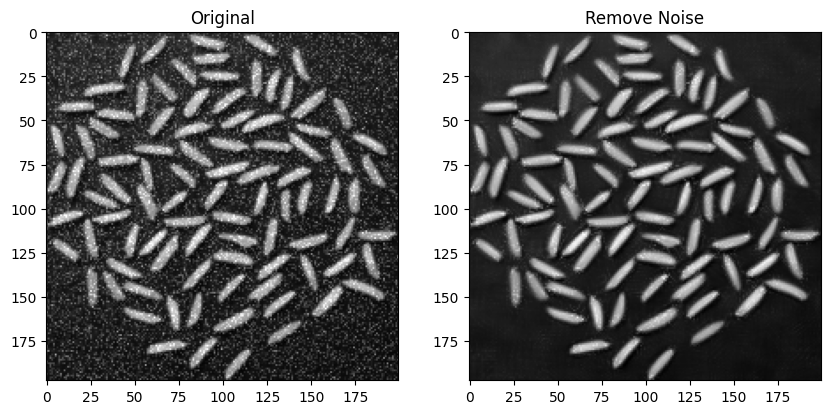

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('rice_gaussian_noise.png', cv.IMREAD_GRAYSCALE)
denoised_img = cv.fastNlMeansDenoising(img, None, h = 28,searchWindowSize=10)

fig, ax= plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(denoised_img, cmap='gray')
ax[1].set_title('Remove Noise')
plt.show()

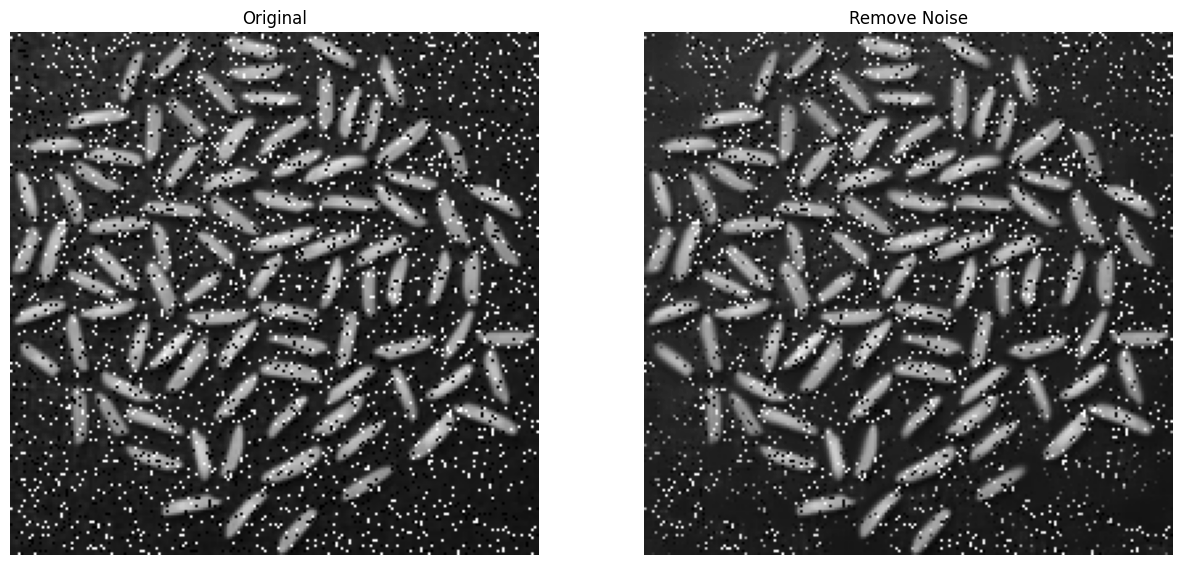

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('rice_salt_pepper_noise.png', cv.IMREAD_GRAYSCALE)
denoised_img1 = cv.fastNlMeansDenoising(img, None, h = 30,searchWindowSize=10)

fig, ax= plt.subplots(1,2, figsize=(15,20))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(denoised_img1, cmap='gray')
ax[1].set_title('Remove Noise')
ax[1].axis('off')
plt.show()

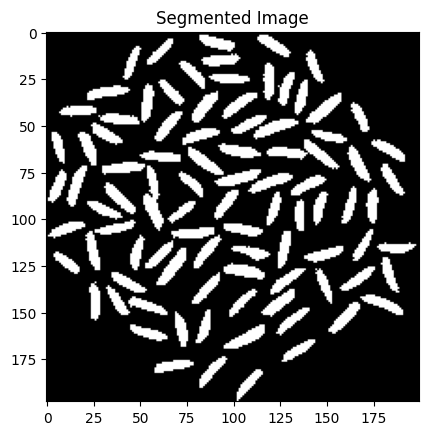

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('rice_gaussian_noise.png', cv.IMREAD_GRAYSCALE)

# Apply denoising
denoised_img = cv.fastNlMeansDenoising(img, None, h=28, searchWindowSize=15)

# Apply Otsu's thresholding
_, segmented_image = cv.threshold(denoised_img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Display the segmented image
fig, ax = plt.subplots()
ax.imshow(segmented_image, cmap='gray')
ax.set_title('Segmented Image')
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()

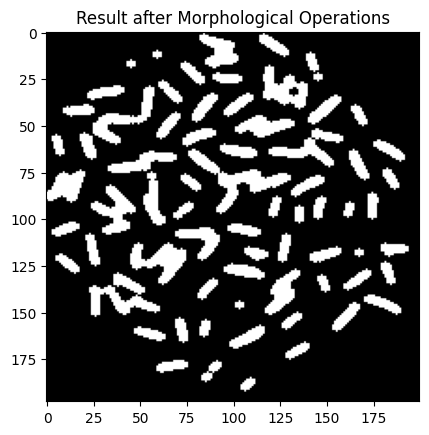

In [4]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

# Perform morphological closing to fill holes
closed_image = cv.morphologyEx(segmented_image, cv.MORPH_CLOSE, kernel)

# Perform morphological opening to remove small objects
opened_image = cv.morphologyEx(closed_image, cv.MORPH_OPEN, kernel)

# Display the result after morphological operations
fig, ax= plt.subplots()
ax.imshow(opened_image, cmap='gray')
ax.set_title('Result after Morphological Operations')
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()

In [5]:
num_labels, labels = cv.connectedComponents(opened_image)

# Subtract 1 to exclude the background label
num_rice_grains = num_labels - 1

print("Number of rice grains:", num_rice_grains)

Number of rice grains: 70
